## Monte Carlo - Euler Discretization - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Load the data for Microsoft (‘MSFT’) for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('D:/Python/MSFT_2000.csv', index_col = 'Date')

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,MSFT
Date,
2017-10-12,0.009118
2017-10-13,0.004786
2017-10-16,0.002063
2017-10-17,-0.000773
2017-10-18,0.000258


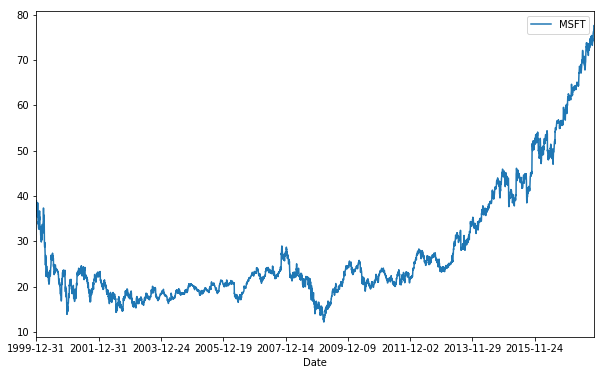

In [5]:
data.plot(figsize=(10, 6));

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.306691
dtype: float64

Set the risk free rate, r, equal to 2.5% (0.025).

In [7]:
r = 0.025

To transform the object into an array, reassign stdev.values to stdev.

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([ 0.30669071])

Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  

Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [12]:
S = np.zeros_like(Z) 

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [13]:
S0 = data.iloc[-1]  
S[0] = S0 

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$

In [14]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [15]:
S

array([[  77.610001  ,   77.610001  ,   77.610001  , ...,   77.610001  ,
          77.610001  ,   77.610001  ],
       [  78.28172567,   76.62365066,   78.60468709, ...,   77.60236661,
          78.42889959,   75.82289922],
       [  76.77768381,   78.69031565,   80.03560566, ...,   78.77271563,
          78.25929652,   77.2624081 ],
       ..., 
       [  70.943376  ,   54.06787789,   99.73059116, ...,  170.95322437,
          61.59979012,   47.06302987],
       [  69.48069713,   54.648357  ,   95.25812645, ...,  169.49031255,
          62.35724608,   46.62576355],
       [  67.57518027,   54.44827666,   96.47152434, ...,  166.23888407,
          61.09813947,   46.01079433]])

In [16]:
S.shape

(251L, 10000L)

Plot the first 10 of the 10,000 generated iterations on a graph.

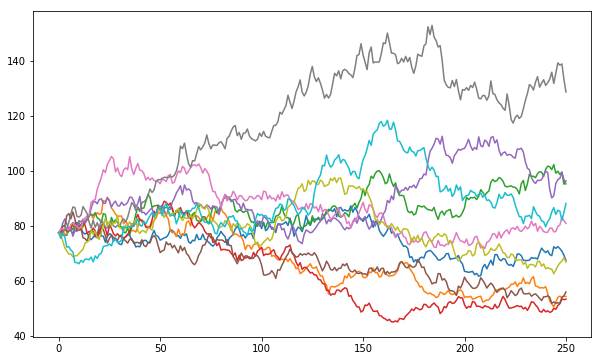

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);